-----------------------------
## Context:
-----------------------------
In this case study, we will use the Air pollution dataset which contains information about 13 months of data on major pollutants and meteorological levels of a city. 

-----------------------------
## Objective: 
-----------------------------
The objective of this problem is to reduce the number of features by using dimensionality reduction techniques like PCA and extract insights. 

## Importing libraries and overview of the dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#Importing PCA and TSNE
from sklearn.decomposition import PCA

#### Loading data

In [22]:
#Loading data
file_path = r"C:\Users\USER\Downloads\Air_Pollution.csv"
data = pd.read_csv(file_path)


In [23]:
data.head()

,SrNo,Date,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,...,WindSpeed,VerticalWindSpeed,Solar,BarPressure,Weather,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO
0,1,04-04-2015,7.22,1.77,47.94,51.07,16.88,48.99,2.53,9.65,...,1.22,0.08,162.18,732.25,Summer,NaN,NaN,NaN,NaN,NaN
1,2,05-04-2015,6.99,0.22,45.27,19.26,16.71,60.20,3.19,11.10,...,0.62,-0.04,99.37,734.05,Summer,48.99,82.85,47.94,16.88,1.77
2,3,09-04-2015,7.60,0.50,59.86,94.29,13.11,46.93,2.29,8.61,...,1.55,-0.17,146.94,728.08,Summer,NaN,NaN,NaN,NaN,NaN
3,4,10-04-2015,7.57,0.77,63.56,66.91,16.19,112.95,3.92,10.76,...,1.18,-0.15,150.07,730.47,Summer,46.93,171.36,59.86,13.11,0.50
4,5,11-04-2015,8.34,0.48,61.99,69.48,20.28,104.87,5.19,15.95,...,0.88,0.15,137.01,730.62,Summer,112.95,232.22,63.56,16.19,0.77


#### Check the info of the data

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SrNo               403 non-null    int64  
 1   Date               403 non-null    object 
 2   NO                 401 non-null    float64
 3   CO                 402 non-null    float64
 4   NO2                401 non-null    float64
 5   O3                 397 non-null    float64
 6   SO2                399 non-null    float64
 7   PM2.5              401 non-null    float64
 8   Benzene            402 non-null    float64
 9   Toulene            402 non-null    float64
 10  P_Xylene           372 non-null    float64
 11  NOx                401 non-null    float64
 12  PM10               401 non-null    float64
 13  WindDirection      402 non-null    float64
 14  NH3                401 non-null    float64
 15  RH                 402 non-null    float64
 16  Temp               401 non

- There are 403 observations and 27 columns in the data.
- All the columns except Date and Weather are of numeric data type.
- The Date and SrNo for all observations would be unique. We can drop these columns as they would not add value to our analysis.
- Weather is of object data type. We can create dummy variables for each category and convert it to numeric data type.
- The majority of the columns have some missing values.
- Let's check the number of missing values in each column.

In [25]:
data.isnull().sum()

SrNo                  0
Date                  0
NO                    2
CO                    1
NO2                   2
O3                    6
SO2                   4
PM2.5                 2
Benzene               1
Toulene               1
P_Xylene             31
NOx                   2
PM10                  2
WindDirection         1
NH3                   2
RH                    1
Temp                  2
WindSpeed             1
VerticalWindSpeed     2
Solar                 2
BarPressure           2
Weather               0
PD_PM2.5             10
PD_PM10              11
PD_NO2               12
PD_SO2               13
PD_CO                11
dtype: int64

- All the columns except SrNo and Date have missing values.

#### Data Preprocessing

In [26]:
data.drop(columns=["SrNo", "Date"], inplace=True)

In [27]:
#Imputing missing values with mode(most frequent) for the Weather column and with median for all other columns
for col in data.columns:
    if col == "Weather":
        data[col].fillna(value=data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(value=data[col].median(), inplace=True)

In [28]:
#Creating dummy variables for Weather column
data = pd.get_dummies(data, drop_first=True)

In [29]:
data.head()

,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,P_Xylene,NOx,...,BarPressure,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO,Weather_Monsoon,Weather_Spring,Weather_Summer,Weather_Winter
0,7.22,1.77,47.94,51.07,16.88,48.99,2.53,9.65,3.00,52.97,...,732.25,108.24,250.105,73.52,21.605,1.775,0,0,1,0
1,6.99,0.22,45.27,19.26,16.71,60.20,3.19,11.10,2.67,51.31,...,734.05,48.99,82.850,47.94,16.880,1.770,0,0,1,0
2,7.60,0.50,59.86,94.29,13.11,46.93,2.29,8.61,3.43,65.53,...,728.08,108.24,250.105,73.52,21.605,1.775,0,0,1,0
3,7.57,0.77,63.56,66.91,16.19,112.95,3.92,10.76,4.66,68.83,...,730.47,46.93,171.360,59.86,13.110,0.500,0,0,1,0
4,8.34,0.48,61.99,69.48,20.28,104.87,5.19,15.95,7.66,67.40,...,730.62,112.95,232.220,63.56,16.190,0.770,0,0,1,0


#### Scaling the data

### Standard scaler and fit to the data_scaled

In [38]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [39]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

## Principal Component Analysis

### PCA with n components and random_state =1 and fit to the scaled data.

In [40]:
#Defining the number of principal components to generate 
n = data_scaled.shape[1]

#Finding principal components for the data
pca1 = PCA(n_components=n, random_state=1)
data_pca = pd.DataFrame(pca1.fit_transform(data_scaled))

#The percentage of variance explained by each principal component
exp_var1 = pca1.explained_variance_ratio_

Text(0, 0.5, 'Cumulative Explained Variance')

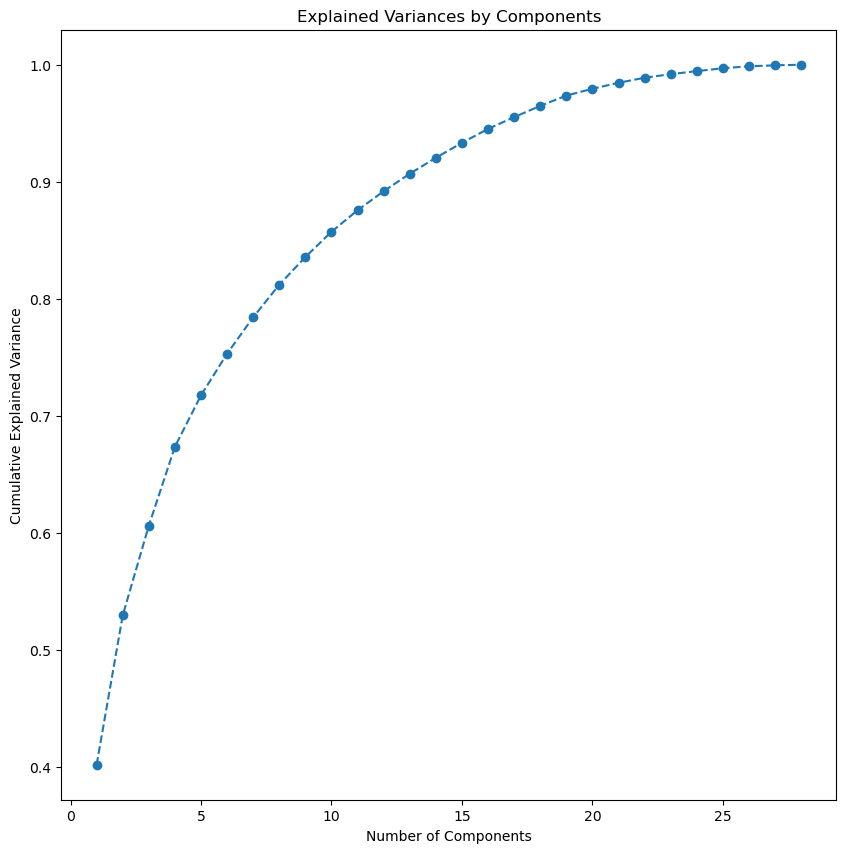

In [41]:
# visulaize the explained variance by individual components
plt.figure(figsize = (10,10))
plt.plot(range(1,29), pca1.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

### Principal components explaining more than 70% variance in the dataset

In [42]:
# find the least number of components that can explain more than 70% variance
sum = 0
for ix, i in enumerate(exp_var1):
  sum = sum + i
  if(sum> 0.7):
    print("Number of PCs that explain at least 70% variance: ", ix+1)
    break

Number of PCs that explain at least 70% variance:  5


In [44]:
#Making a new dataframe with first 8 principal components and original features as indices
cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

pc1 = pd.DataFrame(np.round(pca1.components_.T[:, 0:5],2), index=data_scaled.columns, columns=cols)

### the coefficients of Five principal components from the below dataframe.

In [45]:
def color_high(val):
    if val <= -0.25: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.25:
        return 'background: skyblue'   
    
pc1.style.applymap(color_high)

,PC1,PC2,PC3,PC4,PC5
NO,0.250000,-0.050000,0.180000,0.140000,-0.130000
CO,0.210000,0.040000,0.180000,-0.000000,-0.030000
NO2,0.190000,-0.220000,0.180000,0.060000,0.240000
O3,0.020000,-0.380000,-0.020000,0.180000,0.080000
SO2,0.120000,-0.190000,-0.200000,0.280000,-0.110000
PM2.5,0.260000,-0.060000,-0.100000,-0.180000,-0.140000
Benzene,0.270000,0.090000,0.150000,0.010000,-0.010000
Toulene,0.250000,0.100000,0.270000,0.080000,0.010000
P_Xylene,0.250000,0.070000,0.220000,0.030000,-0.100000
NOx,0.240000,0.010000,0.260000,0.150000,-0.120000
